# GOLD on MCX

MCX, the Multi-Commodity eXchange of India, has a number of gold futures contracts listed. This is how you explore them on pluto.

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(RPostgres)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)
library(reshape2)
library(ggrepel)
library(ggpubr)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")
source("goofy/misc.common.R")

#initialize
commoditiesFnO <- CommodityFuturesAndOptions()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from

In [2]:
#list all gold contracts on the MCX

goldMcx <- commoditiesFnO$McxEod() %>%
    filter(CONTRACT %like% '%gold%' & (OTYPE == 'XX' | OTYPE == 'FUTCOM')) %>%
    group_by(CONTRACT) %>%
    summarize(ST = min(TIME_STAMP, na.rm=T), ET = max(TIME_STAMP, na.rm=T)) %>%
    arrange(ST) %>%
    collect()

goldMcx %>%
    print(n=Inf)

# A tibble: 23 x 3
   CONTRACT   ST         ET        
   <chr>      <date>     <date>    
 1 GOLD       2003-11-10 2019-07-19
 2 GOLDM      2003-11-20 2019-07-19
 3 GOLDHNI    2004-09-27 2010-06-25
 4 GOLDAHM    2005-07-15 2005-12-27
 5 GOLDDEL    2005-07-27 2005-12-27
 6 GOLDKOL    2005-07-27 2005-12-27
 7 GOLDMAHM   2005-09-19 2005-12-27
 8 GOLDMUM    2005-10-19 2005-12-27
 9 GOLDMKOL   2005-11-24 2005-12-27
10 GOLDMDEL   2005-11-24 2005-12-27
11 GOLDMMUM   2005-11-24 2005-12-27
12 IGOLDDEL   2005-12-27 2008-12-30
13 IGOLDAHM   2005-12-27 2008-12-30
14 IGOLDMUM   2005-12-28 2008-12-30
15 IGOLDKOL   2005-12-28 2008-12-30
16 IGOLDMKOL  2005-12-29 2008-12-30
17 IGOLDMAHM  2005-12-31 2008-12-30
18 IGOLDMDEL  2005-12-31 2008-12-30
19 IGOLDMMUM  2005-12-31 2008-12-30
20 GOLDGUINEA 2008-05-08 2019-07-19
21 GOLDPETAL  2011-04-18 2019-07-19
22 GOLDPTLDEL 2011-11-23 2017-06-30
23 GOLDGLOBAL 2015-07-09 2016-03-29


Of these the first two - GOLD and GOLD MINI - are the oldest and represent gold of 1 kg and 100 grams with 995 purity. GOLD MINI has expirations every month whereas GOLD doesn't. GOLDGUINEA and GOLDPETAL were introduced much later in 2008 and 2011, respectively. We will cycle through these four contracts: GOLD, GOLDM, GOLDGUINEA and GOLDPETAL below.

In [3]:
expirySeries <- 0 # closest expiry
contractNames <- c('GOLD', 'GOLDM', 'GOLDGUINEA', 'GOLDPETAL')

In [4]:
plotTimeSeries <- function(cName){
    px <- commoditiesFnO$McxEod() %>%
        filter(CONTRACT == cName & (OTYPE == 'XX' | OTYPE == 'FUTCOM') & EXPIRY_SERIES == expirySeries) %>%
        select(TIME_STAMP, CLOSE, VOLUME) %>%
        collect() %>%
        as.data.frame()
    
    firstDate <- min(px$TIME_STAMP)
    lastDate <- max(px$TIME_STAMP)
    xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

    p1 <- ggplot(px, aes(x=TIME_STAMP, y=CLOSE)) +
        theme_economist() +
        geom_line() +
        scale_y_log10() +
        scale_x_date(breaks = xAxisTicks) +
        labs(x='', y='log(price)', color='', fill='', 
             title=cName, subtitle=sprintf("[%s:%s]", firstDate, lastDate))
        
    p2 <- ggplot(px, aes(x=TIME_STAMP, y=VOLUME)) +
        theme_economist() +
        geom_bar(stat="identity") +
        scale_x_date(breaks = xAxisTicks) +
        labs(x='', y='volume', color='', fill='')
    
    ggarrange(p1, p2, labels=c("Price", "Volume"), ncol=1, nrow=2)
}

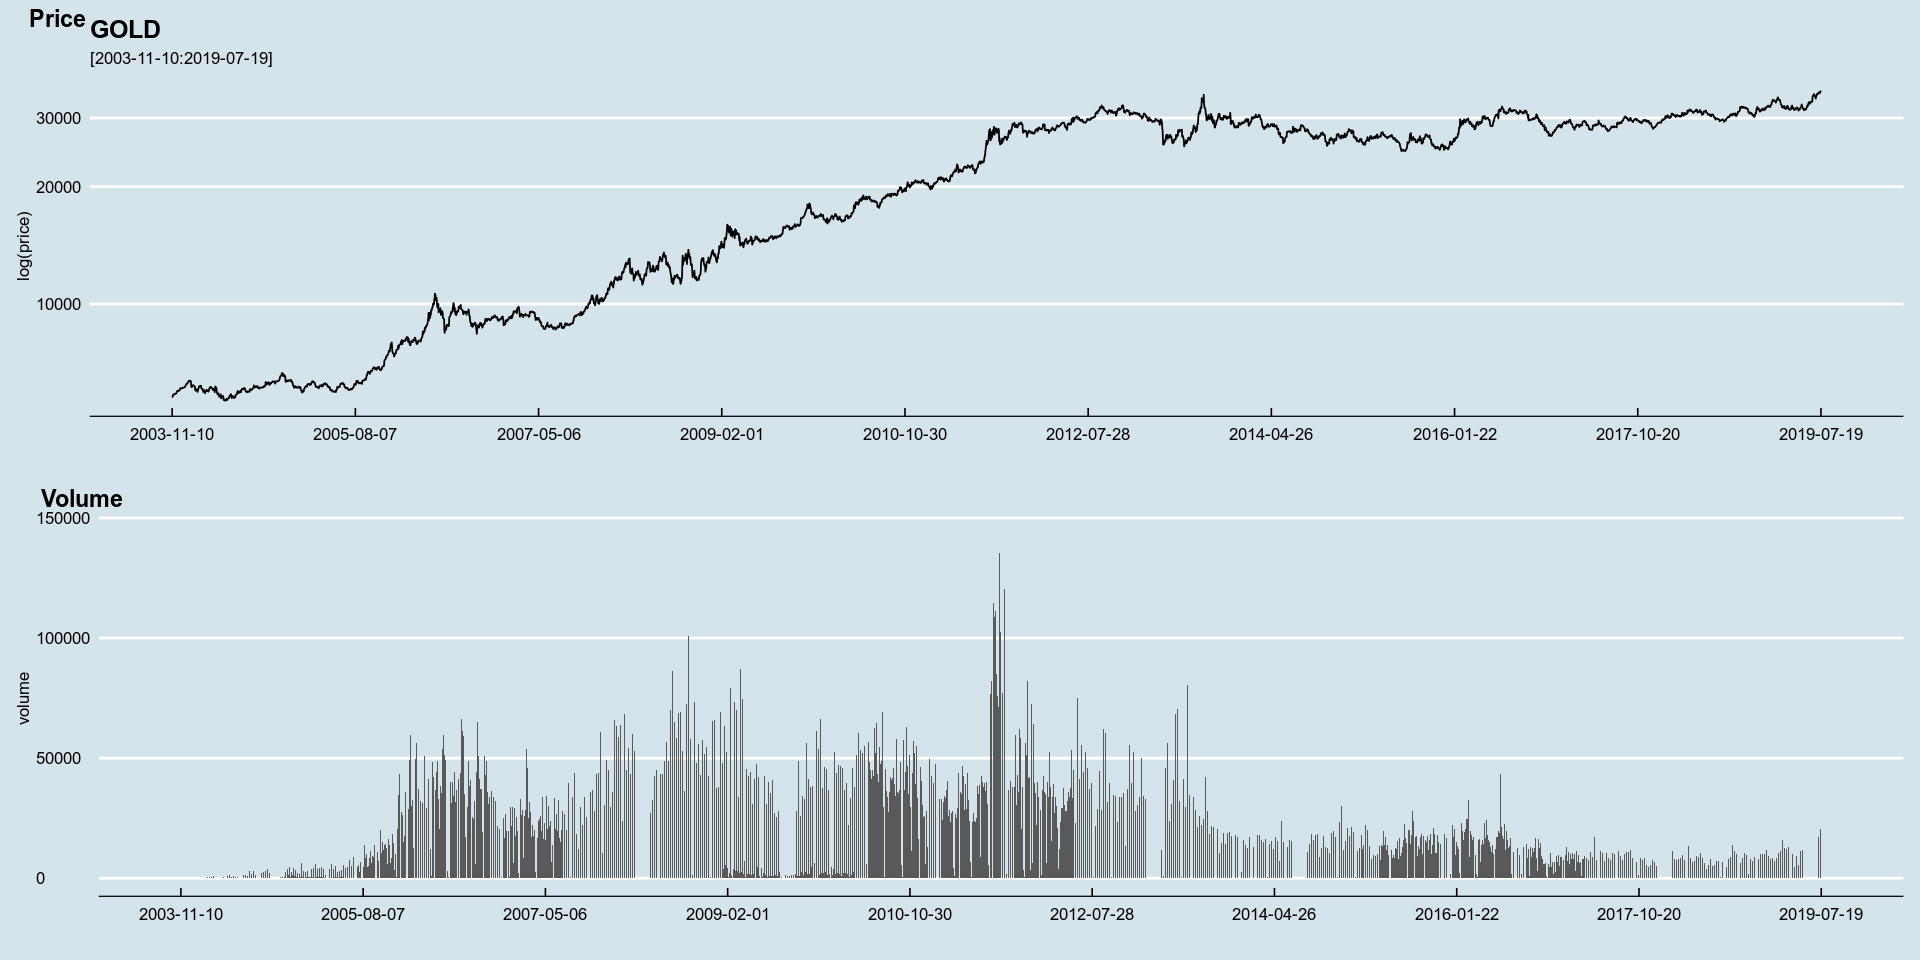

In [5]:
#for(cName in contractNames) plotTimeSeries(cName)
plotTimeSeries('GOLD')

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)